## NAME - Abhishek Pandey
## B.Tech 3rd year 
## College - Madan Mohan Malviya University Of Technology 


## ------------------------------------------------------Task 3--------------------------------------------------------------

### ..............................................................Exploratory Data Analysis - Retail..................................................................

In [135]:
# importing requied libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

plt.rcParams["figure.figsize"] = [14,8]

In [136]:
# read the data
df = pd.read_csv("SampleSuperstore.csv")
storestyle = df.head(20)
storestyle.style.background_gradient(cmap = "RdYlBu_r")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2,0.000000,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940000,3,0.000000,219.582000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2,0.000000,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577500,5,0.450000,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2,0.200000,2.516400
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860000,7,0.000000,14.169400
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280000,4,0.000000,1.965600
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152000,6,0.200000,90.715200
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504000,3,0.200000,5.782500
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900000,5,0.000000,34.470000


In [137]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [138]:
df.describe().style.background_gradient(cmap = "coolwarm_r")

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


as we know that the profit and sales variables are the determining features of any business
and they are varying from 0.444 to 22638.48 (sales) and -6599.978 to 8399.976(profit) they are varying too much . now we will try to find some of the factors responsible for this . 

In [139]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [140]:
df.shape

(9994, 13)

In [141]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [142]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [144]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [145]:
df.duplicated().sum()

17

In [146]:
df.drop_duplicates(subset=None,keep = 'first',inplace=True)
df.duplicated().sum()

0

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


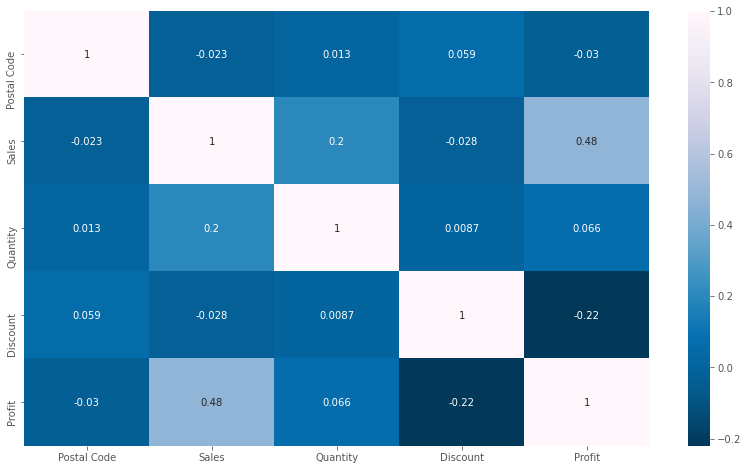

In [147]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PuBu_r')
correlation

as we can see above that
1. Profit is directly proportional to sales .
2. as expected discount is somewhat inversely proportional to profit 
3. as expected quantity is somewhat directly proportional to sales

<AxesSubplot:xlabel='Category', ylabel='Sales'>

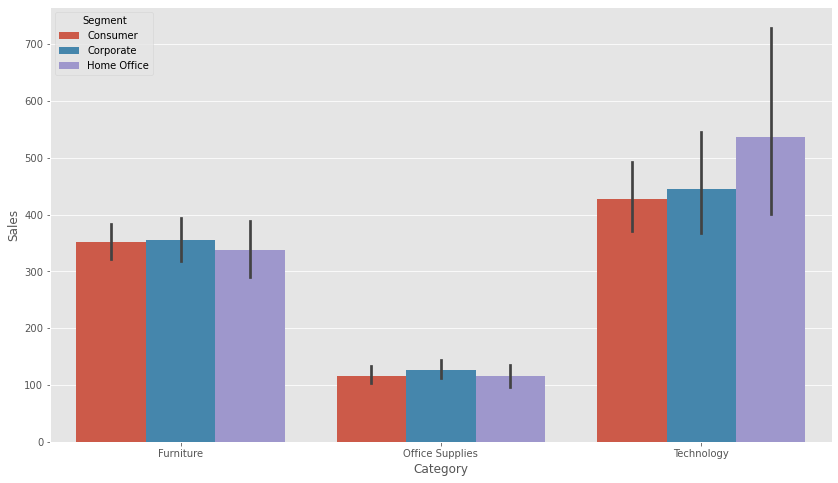

In [148]:
sns.barplot(x = df['Category'] , y= df['Sales'] , hue = df['Segment'] , data = df)

looking at the graph
1. we can say that furnitures are supplied approx equally to all the types of segment somewhere lesser to the home office .
2. same can be said for office supplies too , here a lil bit more in corporate.
3. In the technology sector the sales increases as we go from consumer to home office.

In [149]:
# we can drop postal code columns
df.drop(['Postal Code'], axis = 1 ,inplace =True)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

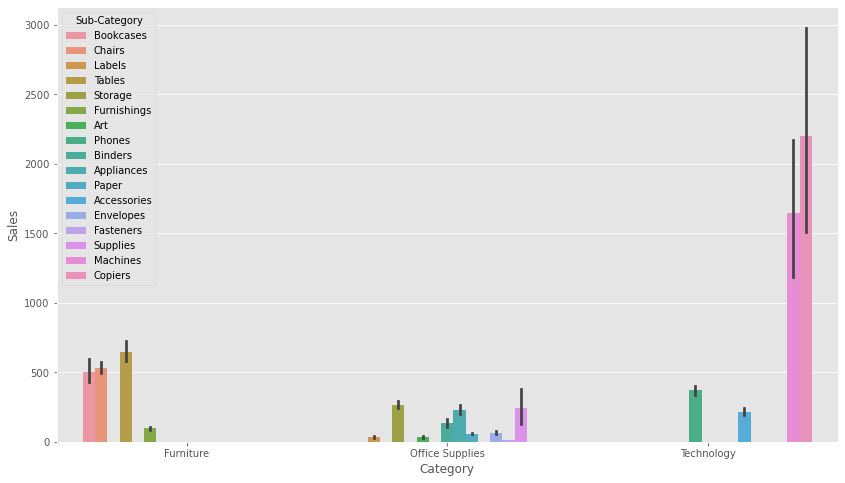

In [150]:
sns.barplot(x = df['Category'] , y= df['Sales'] , hue = df['Sub-Category'] , data = df)

Categories have a specific sub-category demand(sales) like 
- furniture has for bookcases , chairs tables.
- office supllies has atmost every sub category required but mostly storage , copiers.
- in technology art , accessories ,machines , copiers .

<AxesSubplot:xlabel='Category', ylabel='Profit'>

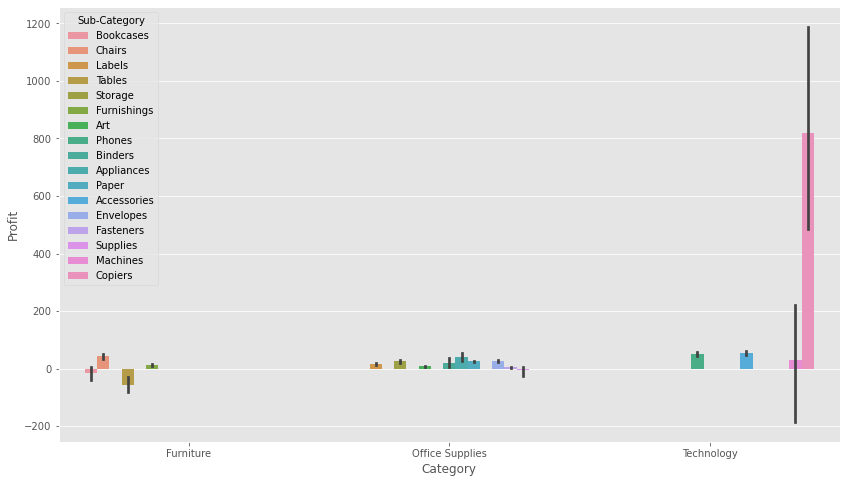

In [151]:
sns.barplot(x = df['Category'] , y= df['Profit'] , hue = df['Sub-Category'] , data = df)

After looking at the above two plots we can say that there are a few categories's sub-category where there is low profit or there is loss even if there sale was good.

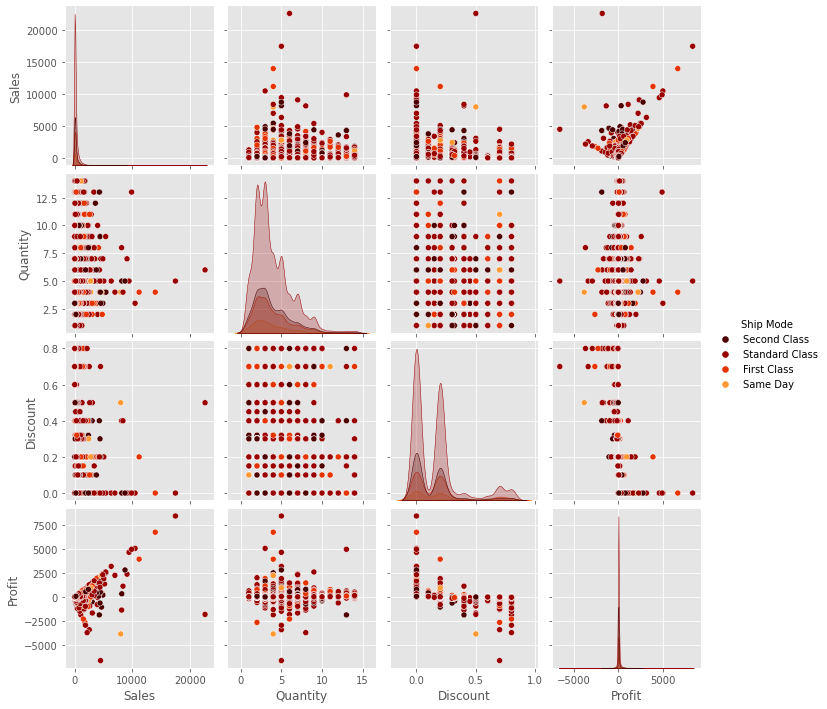

In [152]:
sns.pairplot(df,hue='Ship Mode',palette = 'gist_heat')

above plot is a pair plot .Dependencies can again be seen according to the ship mode in this plot like 
 . . how there are very few second class dots corresponding to the the lesser sale . 

In [153]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [154]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [155]:
df_second = df[df["Ship Mode"] == "Second Class"]
df_standard = df[df["Ship Mode"] == "Standard Class"]
df_first = df[df["Ship Mode"] == "First Class"]
df_same = df[df["Ship Mode"] == "Same Day"]

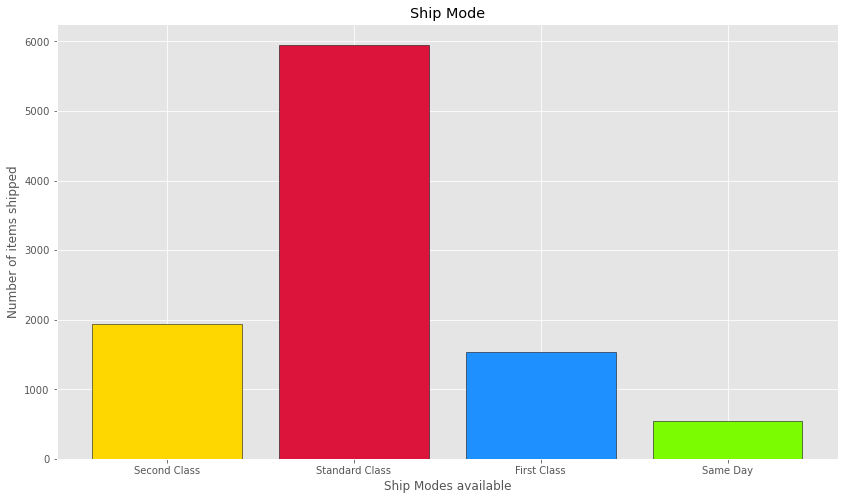

In [156]:
x = ["Second Class", "Standard Class", "First Class", "Same Day"]
y = [len(df_second.index), len(df_standard.index), len(df_first.index), len(df_same.index)]
plt.bar(x, y, color = ["gold", "crimson", "dodgerblue", "lawngreen"], edgecolor = "black")
plt.title("Ship Mode")
plt.xlabel("Ship Modes available")
plt.ylabel("Number of items shipped")
plt.grid(True)
plt.show()

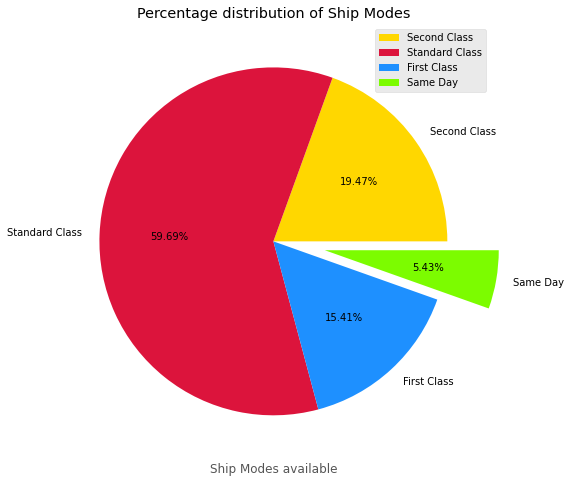

In [157]:
plt.pie(y, labels = x, colors = ["gold", "crimson", "dodgerblue", "lawngreen"],autopct="%1.2f%%", explode=(0,0,0,0.3))
plt.title("Percentage distribution of Ship Modes")
plt.xlabel("Ship Modes available")
plt.legend()
plt.grid(True)
plt.show()

 from above two plots we can say that maximum number of items are shipped through standard class while same day shipping mode is least used . 
 

In [158]:
#valuecounts for segment
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

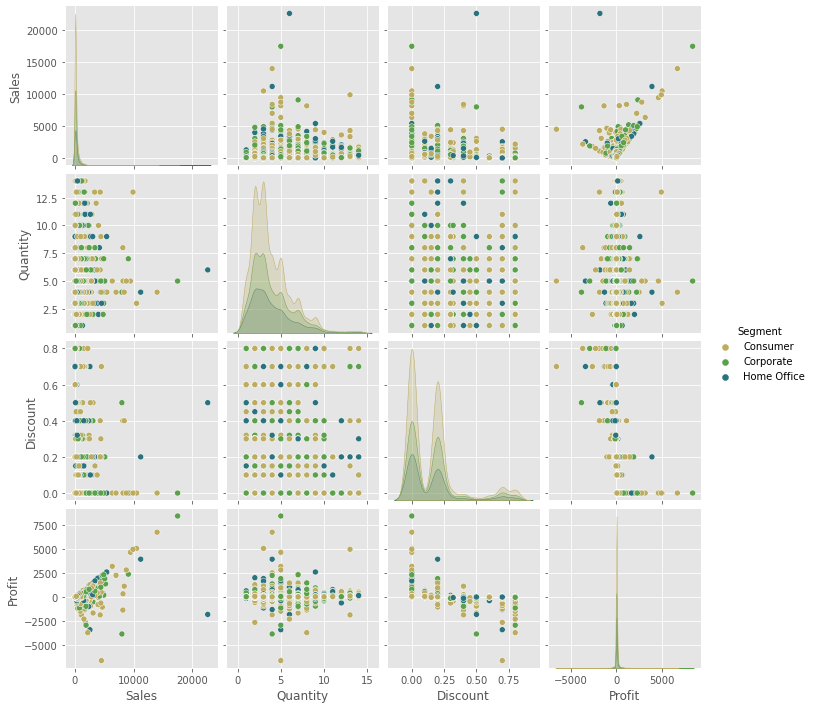

In [159]:
sns.pairplot(df, hue = 'Segment', palette = 'gist_earth_r')

from the above graph we can say that
1. home office has low chances of occuring in the low discount region .
2. profit can be maximized decreasing the quantity.
3. with some exceptions profit increases if the sales increases it is because some times the sales increases due to the discount .


In [160]:
df_con = df[df["Segment"] == "Consumer"]
df_corp = df[df["Segment"] == "Corporate"]
df_home = df[df["Segment"] == "Home Office"]

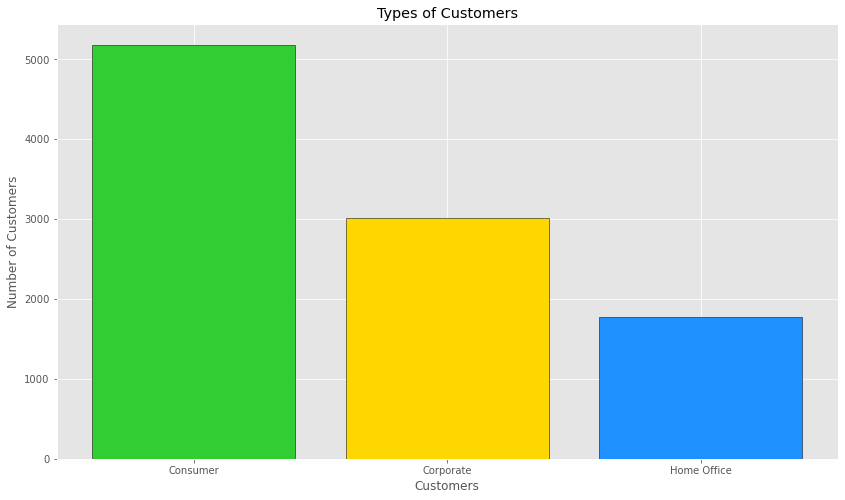

In [161]:
x = ["Consumer", "Corporate", "Home Office"]
y = [len(df_con.index), len(df_corp.index), len(df_home.index)]
plt.bar(x, y, color = ["limegreen", "gold", "dodgerblue"], edgecolor = "black")
plt.title("Types of Customers")
plt.xlabel("Customers")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

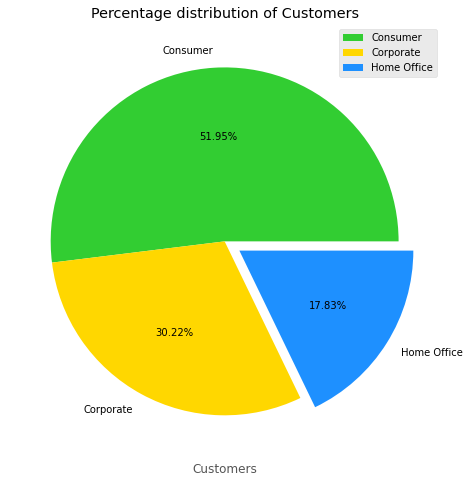

In [162]:
plt.pie(y, labels = x, colors = ["limegreen", "gold", "dodgerblue"],autopct="%1.2f%%", explode=(0,0,0.1))
plt.title("Percentage distribution of Customers")
plt.xlabel("Customers")
plt.legend()
plt.grid(True)
plt.show()

this shows that most of the customers are consumer 

In [163]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

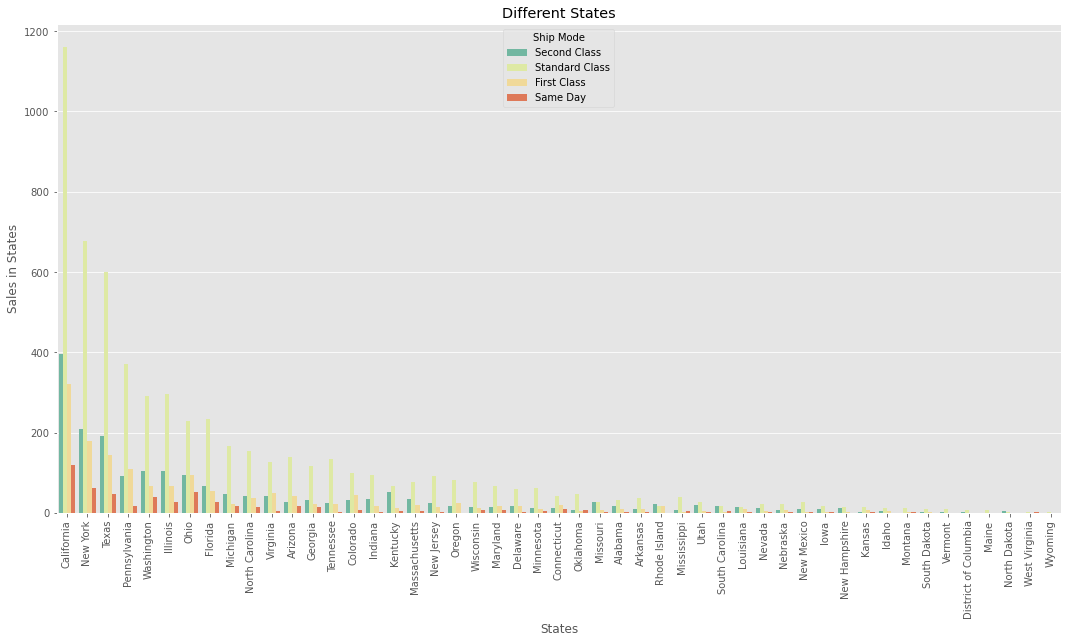

In [164]:
plt.figure(figsize=(18,9))
sns.countplot(x='State', data=df, hue = 'Ship Mode',palette='Spectral_r', order=df['State'].value_counts().index)
plt.title("Different States")
plt.xlabel("States")
plt.ylabel("Sales in States")
plt.xticks(rotation=90)
plt.show()

This shows that the california has the highest sales and most of the cities fulfill their demands through "Standard class" ship mode .

In [165]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

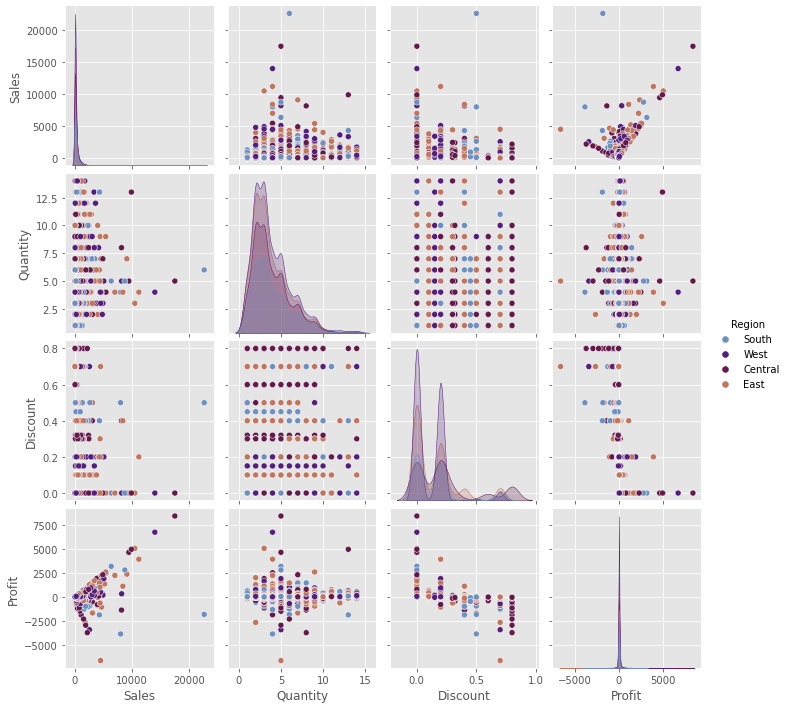

In [166]:
sns.pairplot(df, hue = 'Region', palette = 'twilight')

In [167]:
df_south = df[df["Region"] == "South"]
df_west = df[df["Region"] == "West"]
df_central = df[df["Region"] == "Central"]
df_east = df[df["Region"] == "East"]

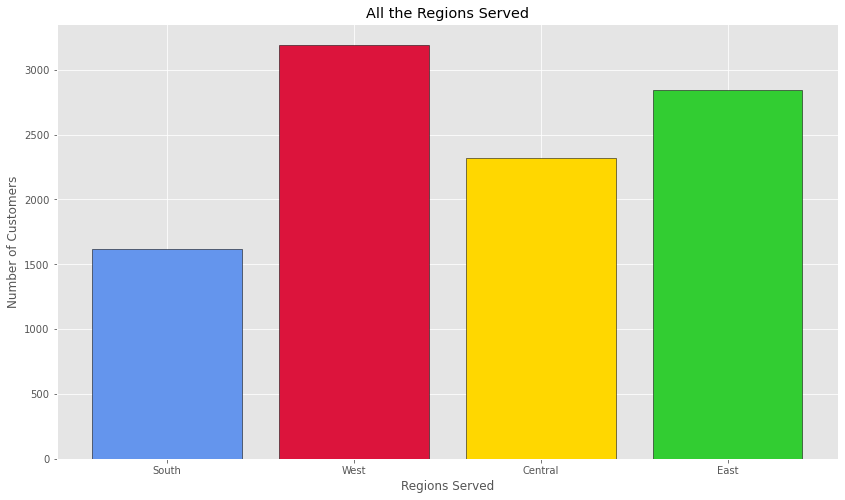

In [168]:
x = ["South", "West", "Central", "East"]
y = [len(df_south.index), len(df_west.index), len(df_central.index), len(df_east.index),]
plt.bar(x, y, color = ["cornflowerblue", "crimson", "gold", "limegreen"], edgecolor = "black")
plt.title("All the Regions Served")
plt.xlabel("Regions Served")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

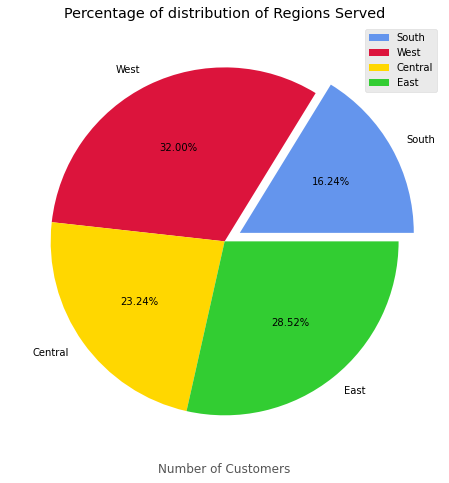

In [169]:
plt.pie(y, labels = x, colors = ["cornflowerblue", "crimson", "gold", "limegreen"], autopct="%1.2f%%", explode=(0.1,0,0,0))
plt.title("Percentage of distribution of Regions Served")
plt.xlabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.show()

We can see that the west region has the highest sale if we compare region wise .Number of custumers in south is needed to be increased.

In [170]:
mode_profit = df.groupby("Ship Mode")["Profit"].sum()
segment_profit = df.groupby("Segment")["Profit"].sum()
region_profit = df.groupby("Region")["Profit"].sum()
category_profit = df.groupby("Category")["Profit"].sum()

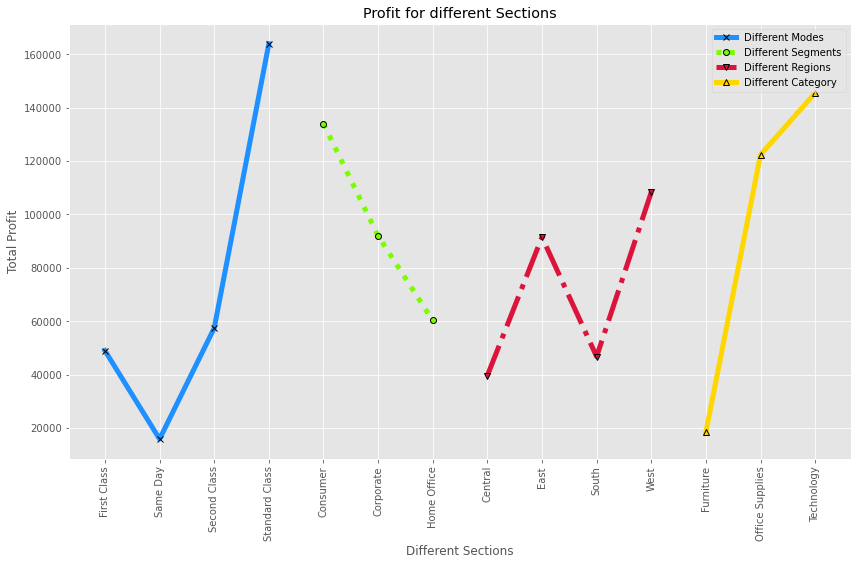

In [171]:
plt.plot(mode_profit, color="dodgerblue", lw=5, ls="-", marker="x", label="Different Modes", markeredgecolor="black")
plt.plot(segment_profit, color="lawngreen", lw=5, ls=":", marker="o", label="Different Segments", markeredgecolor="black")
plt.plot(region_profit, color="crimson", lw=5, ls="-.", marker="v", label="Different Regions", markeredgecolor="black")
plt.plot(category_profit, color="gold", lw=5, marker="^", label="Different Category", markeredgecolor="black")
plt.title("Profit for different Sections")
plt.xticks(rotation=90)
plt.xlabel("Different Sections")
plt.ylabel("Total Profit")
plt.legend()
plt.grid(True)
plt.show()

According to this a technical consumer based company in west region using standard mode for shipping will earn the best profit .  

In [172]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

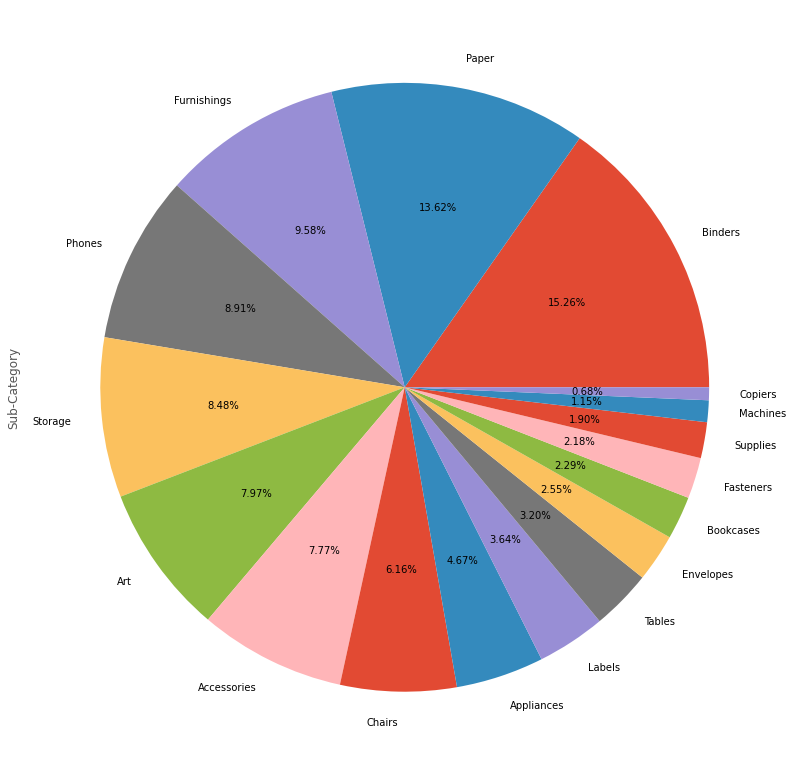

In [173]:
plt.figure(figsize=(15,14))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

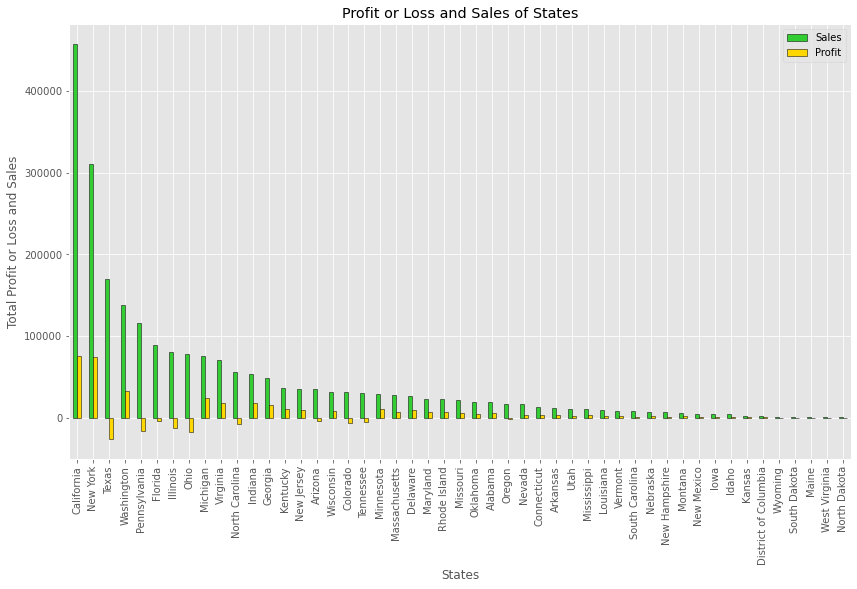

In [174]:
state_sal_pro = df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
state_sal_pro.plot(kind="bar", color=["limegreen", "gold"], edgecolor="black")
plt.title("Profit or Loss and Sales of States")
plt.xlabel("States")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

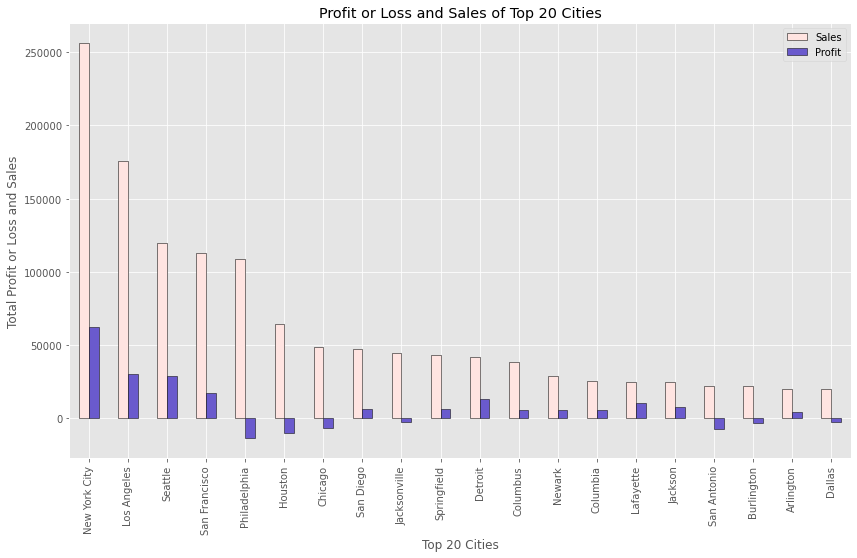

In [175]:
city_sal_pro = df.groupby("City")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).head(20)
city_sal_pro.plot(kind="bar", color=["mistyrose", "slateblue"], edgecolor="black")
plt.title("Profit or Loss and Sales of Top 20 Cities")
plt.xlabel("Top 20 Cities")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

from above plots it can be seen that even the sale is higher for a city it is not necessary that the profit from that city will be more.

In [176]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

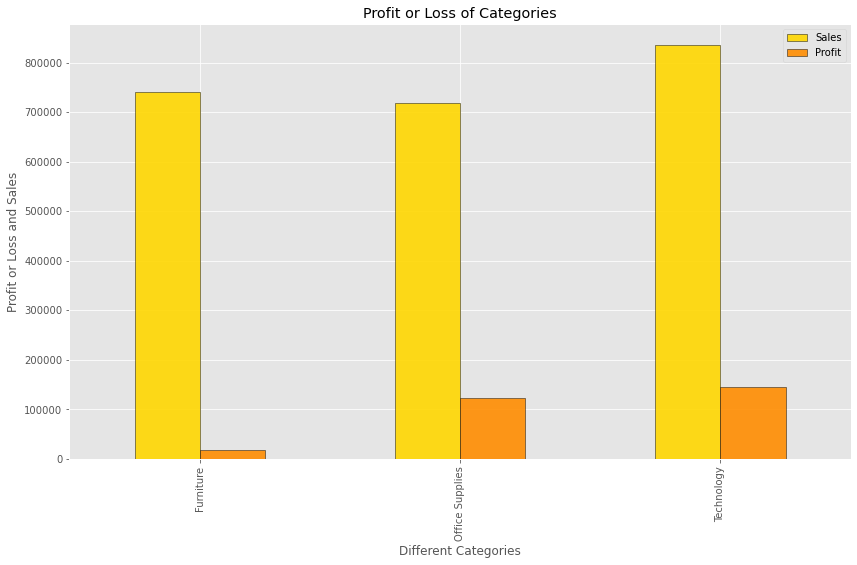

In [177]:
df.groupby("Category")[["Sales","Profit"]].sum().plot.bar(color=["gold","darkorange"],alpha=0.9,edgecolor="black")
plt.title("Profit or Loss of Categories")
plt.xlabel("Different Categories")
plt.ylabel("Profit or Loss and Sales")
plt.show()

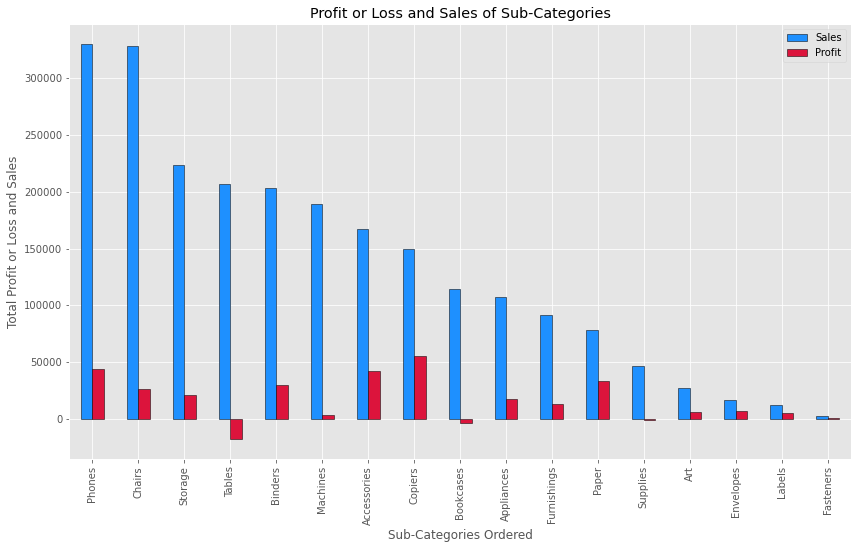

In [178]:
subcat_sal_pro = df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
subcat_sal_pro.plot(kind="bar", color=["dodgerblue", "crimson"], edgecolor="black")
plt.title("Profit or Loss and Sales of Sub-Categories")
plt.xlabel("Sub-Categories Ordered")
plt.ylabel("Total Profit or Loss and Sales")
plt.grid(True)
plt.show()

same can be said for the Categories and sub categories of items that the profit is not affected or depends on sales .


Text(0, 0.5, 'Sales')

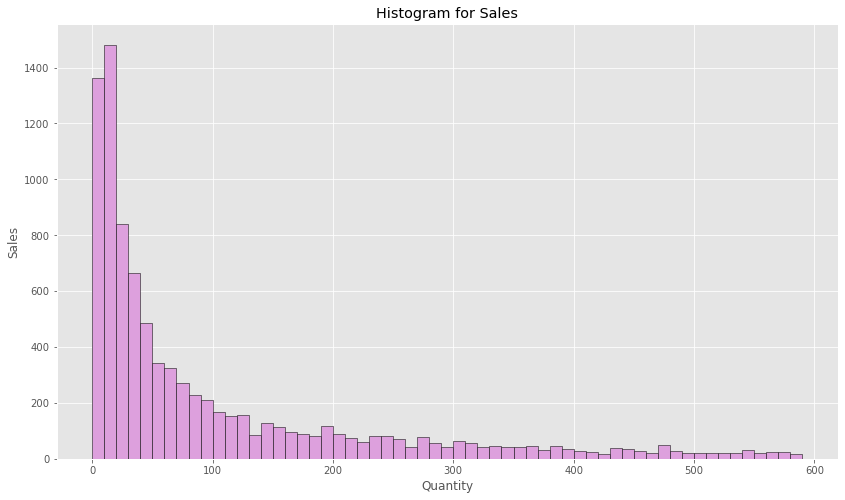

In [179]:
plt.hist(df["Sales"],bins=(np.arange(0,600,10)),color="plum",edgecolor="black")
plt.title("Histogram for Sales")
plt.xlabel("Quantity")
plt.ylabel("Sales")

expect a few of the cases the "Sale" is in general decresing with increase in quantity of goods. 

Text(0, 0.5, 'Profit')

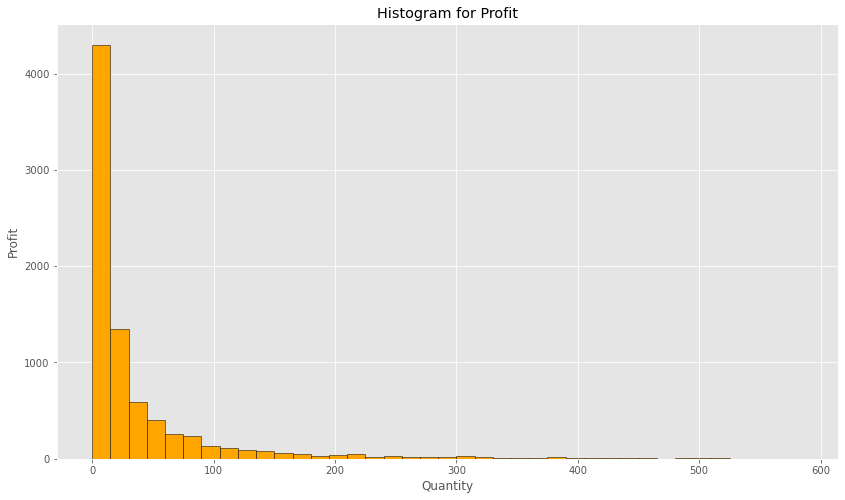

In [180]:
plt.hist(df["Profit"],bins=(np.arange(0,600,15)),color="orange",edgecolor="black")
plt.title("Histogram for Profit")
plt.xlabel("Quantity")
plt.ylabel("Profit")

Same can be said here also with extra assurity.

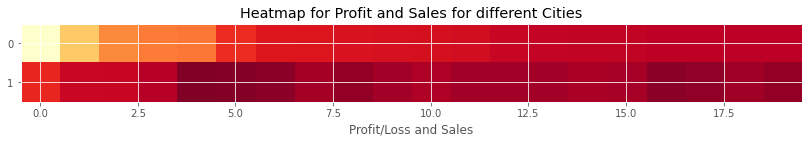

In [181]:
plt.imshow(city_sal_pro.transpose(), cmap='YlOrRd_r', interpolation='nearest')
plt.title("Heatmap for Profit and Sales for different Cities")
plt.xlabel("Profit/Loss and Sales")
plt.show()

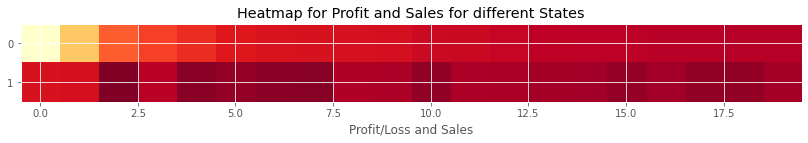

In [182]:
plt.imshow(state_sal_pro.head(20).transpose(), cmap='YlOrRd_r', interpolation='nearest')
plt.title("Heatmap for Profit and Sales for different States")
plt.xlabel("Profit/Loss and Sales")
plt.show()

## Final conclussions of the data 


1. Quantity sold doesn't depends on the discount offered. 
2. Profit and Sales are maximum in consumer segment and minimum in home office segment.
3. Highest number of buyers are from California and New York.
4. Improvements needed in Southern Region.
5. Improvement needed in Same Day Shipment Mode.
6. Maximum Profits are from binders, papers, furnishings,etc.
7. Profit doesn't depends on the sale .
8. Loss in Texas, pennsylvania and Ohio.
9. Technology and Office Supplies have high profit whereas Furniture has less profit.
10. Phone sub-categories have high sales, Chairs have high sale but less profit, whereas, Tables and Bookcases sub-categories are facing huge losses.
11. discount should be less on chairs to increase the profit